# Data Mining (KEN4113) #
## Lab 4: Clustering ##

Konstantin Sandfort
i6255681

In [85]:
# Imports
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import contingency_matrix
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import DBSCAN

## Assignment 1

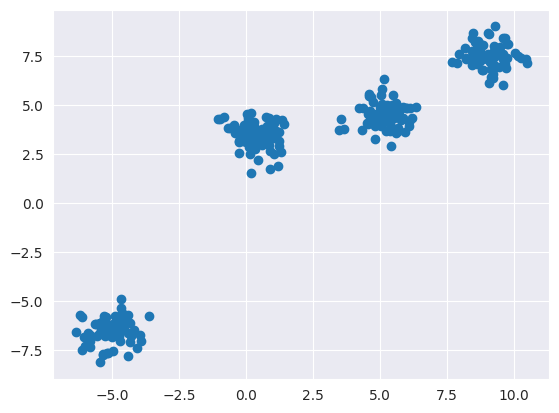

In [86]:
# (a) Data Generation

#centers = [[-3, -3], [3, -3], [-3, 3], [3, 3]]
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=None)
plt.scatter(X[:, 0], X[:, 1])

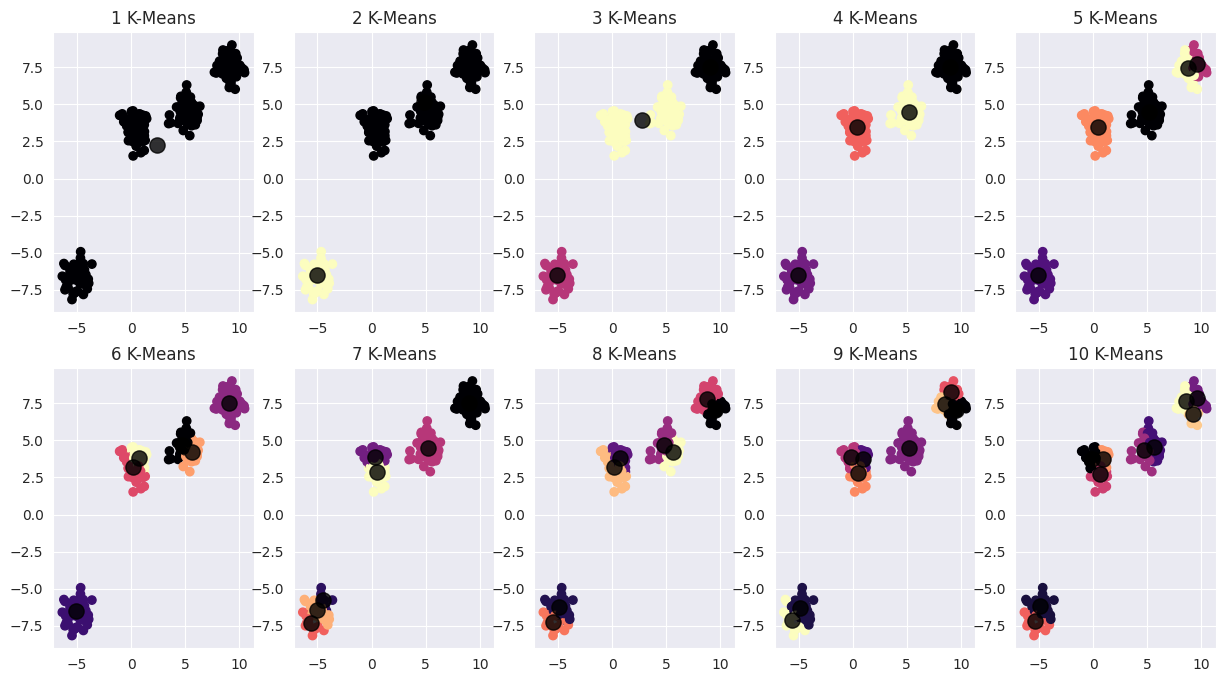

In [87]:
# (b) K-Means clustering
fig, axs = plt.subplots(2, 5, figsize=(15, 8))
y_kmeans_list = []
scores = []

for i in range(10):
    # Define k
    k = i+1
    # Fit model
    clusters = KMeans(n_clusters=k, random_state=None, n_init="auto").fit(X)
    y_kmeans = clusters.predict(X)
    y_kmeans_list.append(y_kmeans)
    # Retrieve scores (SSE)
    scores.append(clusters.score(X))
    # Retrieve cluster centers
    cntr = clusters.cluster_centers_
    # Create subplots
    axs[int(i / 5), i % 5].scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='magma')
    axs[int(i / 5), i % 5].scatter(cntr[:, 0], cntr[:, 1], c='black', s=120, alpha=0.8)
    axs[int(i / 5), i % 5].set_title(f'{k} K-Means')
plt.show()

In [88]:
# (b) K-Means Contingency Matrices

for i in range(10):
    print(f'Contingency Matrix for k = {i+1}')
    print(contingency_matrix(y, y_kmeans_list[i]))
    print('---')

Contingency Matrix for k = 1
[[75]
 [75]
 [75]
 [75]]
---
Contingency Matrix for k = 2
[[75  0]
 [ 0 75]
 [75  0]
 [75  0]]
---
Contingency Matrix for k = 3
[[75  0  0]
 [ 0 75  0]
 [ 0  0 75]
 [ 0  0 75]]
---
Contingency Matrix for k = 4
[[75  0  0  0]
 [ 0 75  0  0]
 [ 0  0  0 75]
 [ 0  0 75  0]]
---
Contingency Matrix for k = 5
[[ 0  0 26  0 49]
 [ 0 75  0  0  0]
 [75  0  0  0  0]
 [ 0  0  0 75  0]]
---
Contingency Matrix for k = 6
[[ 0  0 75  0  0  0]
 [ 0 75  0  0  0  0]
 [40  0  0  0 35  0]
 [ 0  0  0 45  0 30]]
---
Contingency Matrix for k = 7
[[75  0  0  0  0  0  0]
 [ 0 13  0  0 17 45  0]
 [ 0  0  0 75  0  0  0]
 [ 0  0 43  0  0  0 32]]
---
Contingency Matrix for k = 8
[[27  0  0  0 48  0  0  0]
 [ 0 53  0  0  0 22  0  0]
 [ 0  0  0 40  0  0  0 35]
 [ 0  0 30  0  0  0 45  0]]
---
Contingency Matrix for k = 9
[[27  0  0  0  0 21  0 27  0]
 [ 0 54  0  0  0  0  0  0 21]
 [ 0  0  0 75  0  0  0  0  0]
 [ 0  0 22  0 27  0 26  0  0]]
---
Contingency Matrix for k = 10
[[ 0  0  0 23  0

Text(0, 0.5, 'SSE')

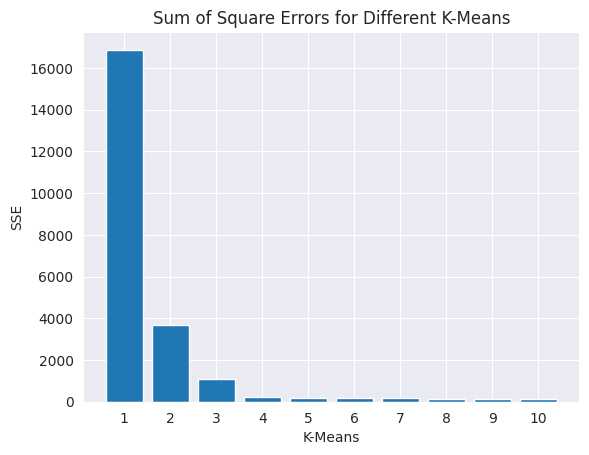

In [89]:
# (c) Sum of Square Errors

# Create x labels for barplot
x_labels = []
for i in range(10):
    x_labels.append(str(i + 1))

plt.bar(x_labels, np.abs(scores))
plt.title('Sum of Square Errors for Different K-Means')
plt.xlabel('K-Means')
plt.ylabel('SSE')


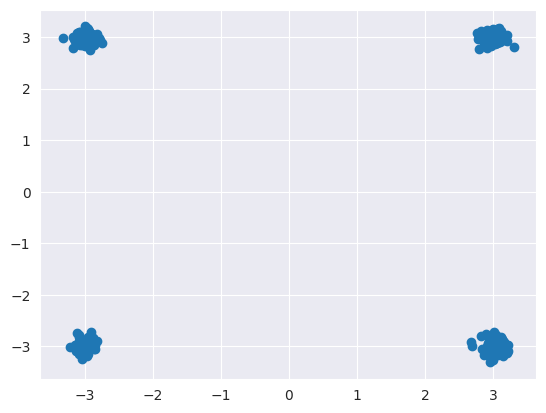

In [90]:
# (d) New Standard Deviation
X, y = make_blobs(n_samples=300, centers=centers, cluster_std=0.1, random_state=None)
# Plot
plt.scatter(X[:, 0], X[:, 1])

[-5398.591545581903, -2697.642449329734, -1346.4938156093506, -5.932773678765674, -5.4834535552312955, -4.961057394173312, -4.681424169167254, -3.8885230181168264, -3.431632917178499, -3.6216434093565555]


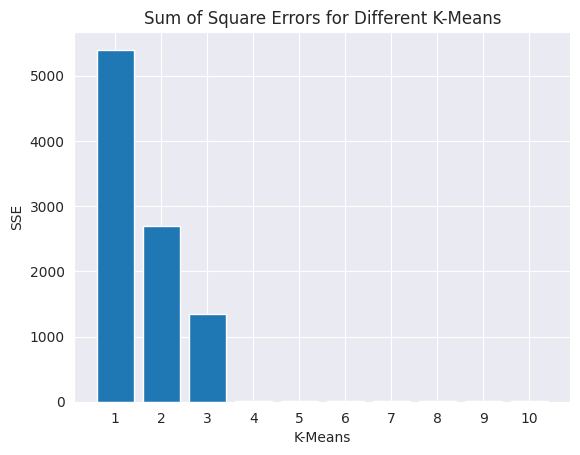

In [91]:
# (d) Calculate SSE for new blobs
scores = []
for i in range(10):
    # Define k
    k = i+1
    # Fit model
    clusters = KMeans(n_clusters=k, random_state=None, n_init="auto").fit(X)
    y_kmeans = clusters.predict(X)
    # Retrieve scores (SSE)
    scores.append(clusters.score(X))
    
plt.bar(x_labels, np.abs(scores))
plt.title('Sum of Square Errors for Different K-Means')
plt.xlabel('K-Means')
plt.ylabel('SSE')

# Print scores because values are no
print(scores)

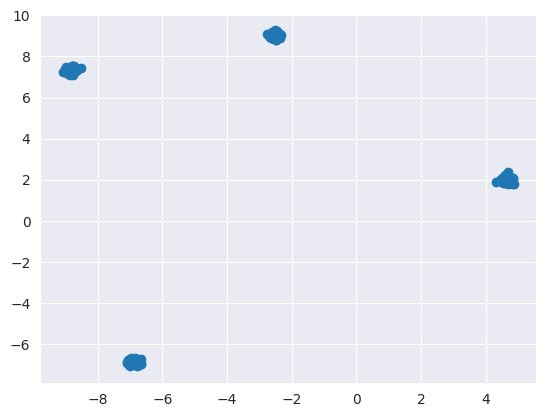

In [92]:
# (e)

X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.1, random_state=42)
plt.scatter(X[:, 0], X[:, 1])

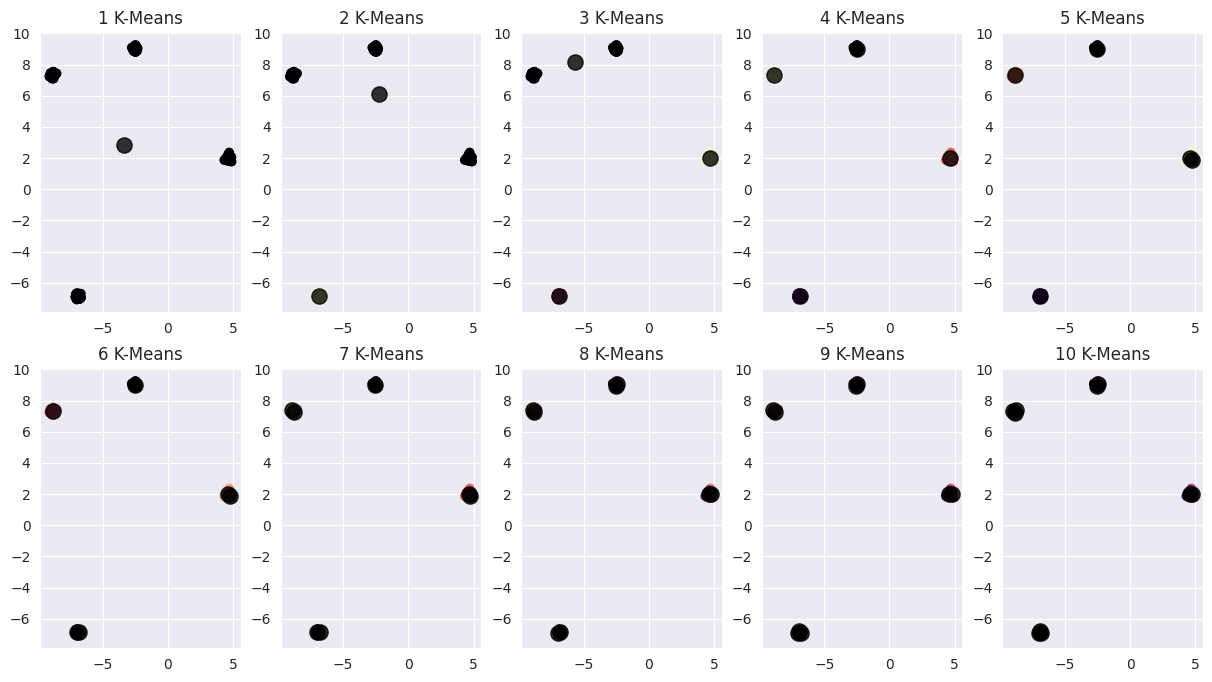

In [93]:
# (e) New k-Means clustering
# (b) K-Means clustering
fig, axs = plt.subplots(2, 5, figsize=(15, 8))
y_kmeans_list = []
scores = []

for i in range(10):
    # Define k
    k = i+1
    # Fit model
    clusters = KMeans(n_clusters=k, random_state=42, n_init="auto").fit(X)
    y_kmeans = clusters.predict(X)
    y_kmeans_list.append(y_kmeans)
    # Retrieve scores (SSE)
    scores.append(clusters.score(X))
    # Retrieve cluster centers
    cntr = clusters.cluster_centers_
    # Create subplots
    axs[int(i / 5), i % 5].scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='magma')
    axs[int(i / 5), i % 5].scatter(cntr[:, 0], cntr[:, 1], c='black', s=120, alpha=0.8)
    axs[int(i / 5), i % 5].set_title(f'{k} K-Means')
plt.show()

## Assignment 2

In [94]:
# Load data
X = pd.read_csv('vertebrate.csv')
print(X.head(20))

# Remove non-numeric columns
y = X['Class']
X = X.drop(columns=['Name', 'Class'])
print(X.columns)

             Name  Warm-blooded  Gives Birth  Aquatic Creature  \
0           human             1            1                 0   
1          python             0            0                 0   
2          salmon             0            0                 1   
3           whale             1            1                 1   
4            frog             0            0                 1   
5          komodo             0            0                 0   
6             bat             1            1                 0   
7          pigeon             1            0                 0   
8             cat             1            1                 0   
9   leopard shark             0            1                 1   
10         turtle             0            0                 1   
11        penguin             1            0                 1   
12      porcupine             1            1                 0   
13            eel             0            0                 1   
14     sal

In [95]:
# Source: https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html
def hierarchical_clustering(link_type: str):
    Z = linkage(X, link_type)
    plt.figure(figsize=(10, 5))
    dn_ = dendrogram(Z)

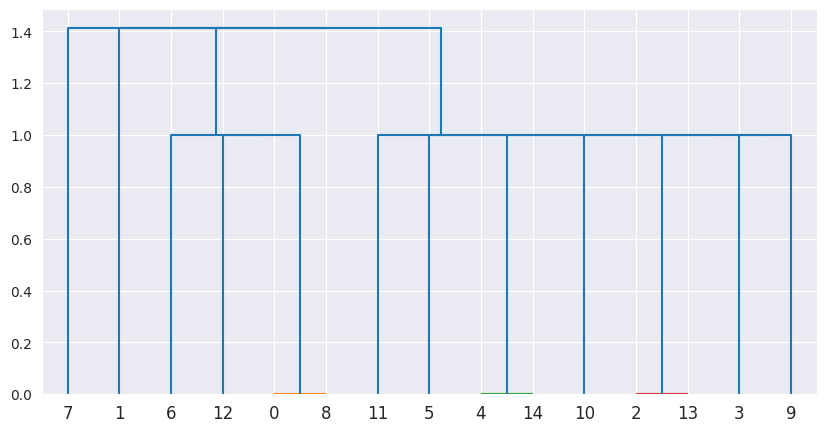

In [96]:
hierarchical_clustering('single')

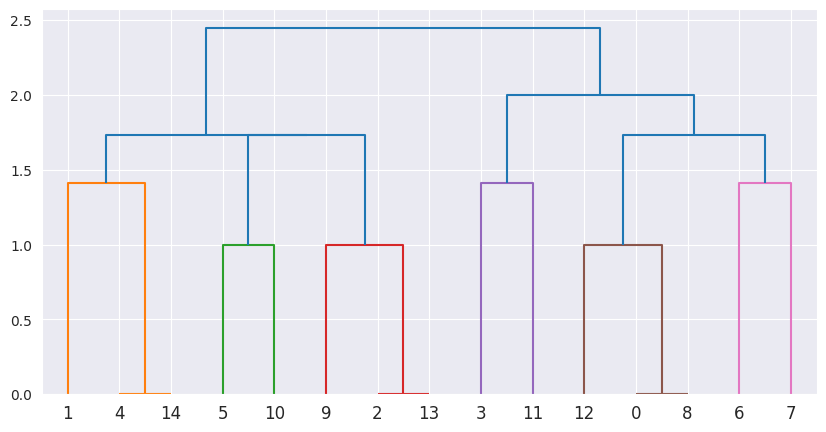

In [97]:
hierarchical_clustering('complete')

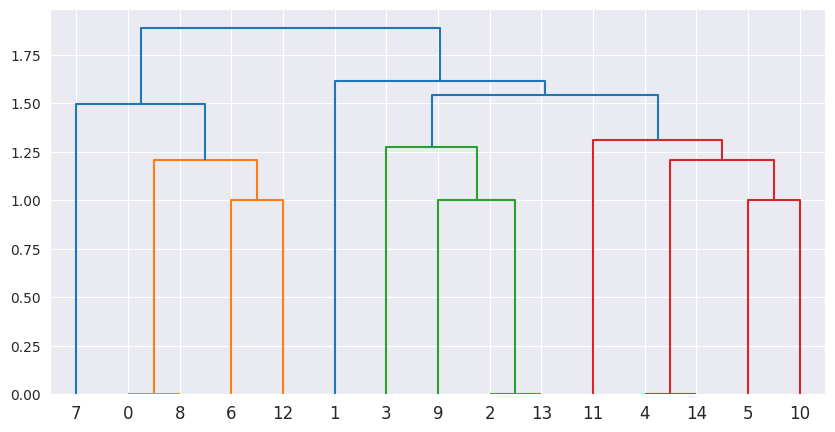

In [98]:
hierarchical_clustering('average')

## Assignment 3

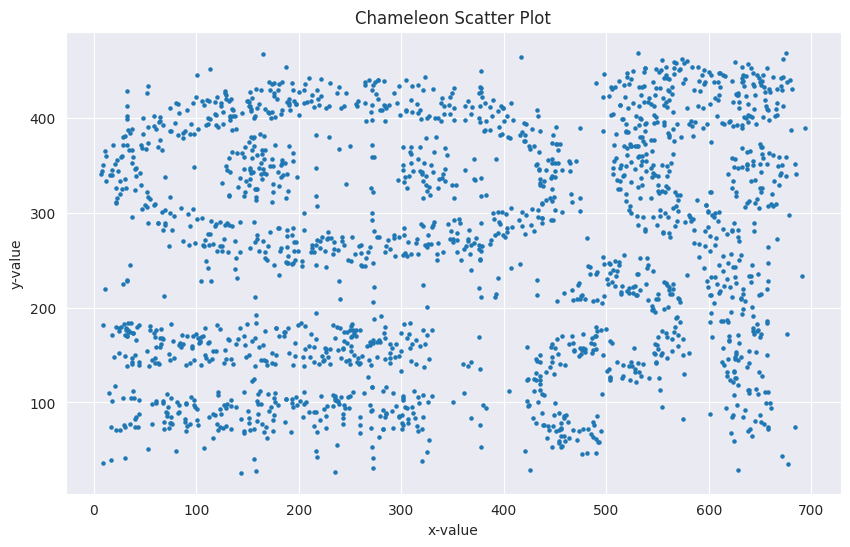

In [122]:
# Load data
X = pd.read_csv('chameleon.csv')
#print(X.iloc[:, 0])
plt.figure(figsize=(10, 6))
plt.title('Chameleon Scatter Plot')
plt.xlabel('x-value')
plt.ylabel('y-value')
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s=5)

In [132]:
# (c) - Experiment with different EPS values

def exec_DBSCAN(eps_value):
    db = DBSCAN(eps=eps_value, min_samples=5)
    db.fit(X)
    pred = db.fit_predict(X)
    
    plt.figure(figsize=(10, 6))
    plt.title(f'Scatter Plot (EPS = {eps_value})')
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=pred, s=5, cmap='viridis')

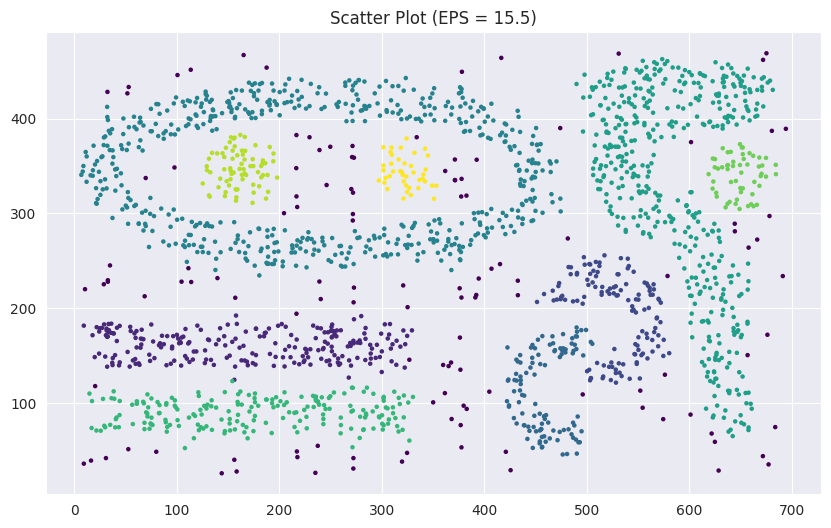

In [133]:
exec_DBSCAN(15.5)

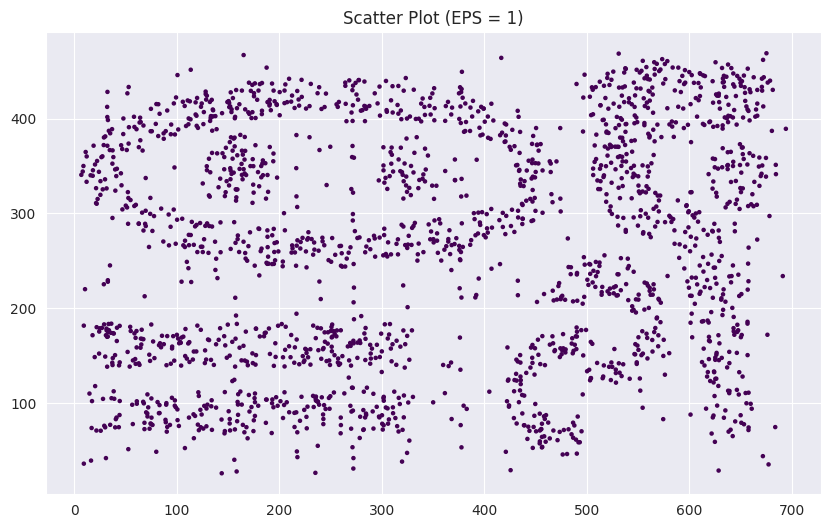

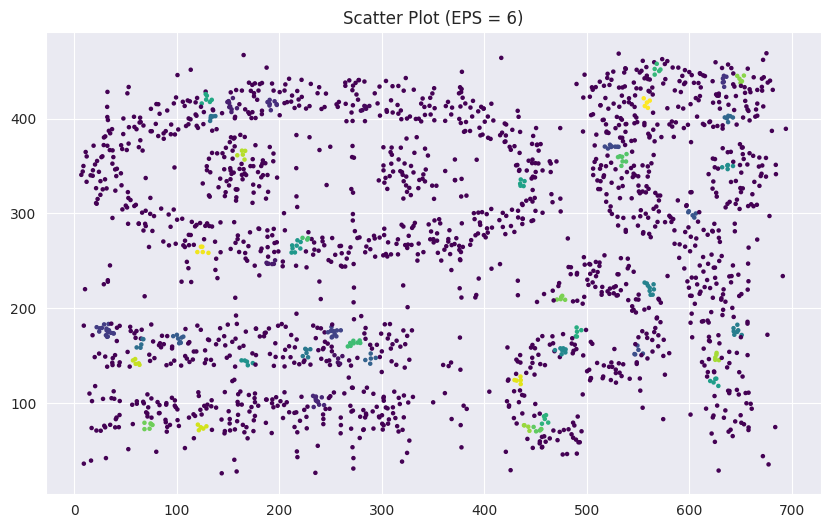

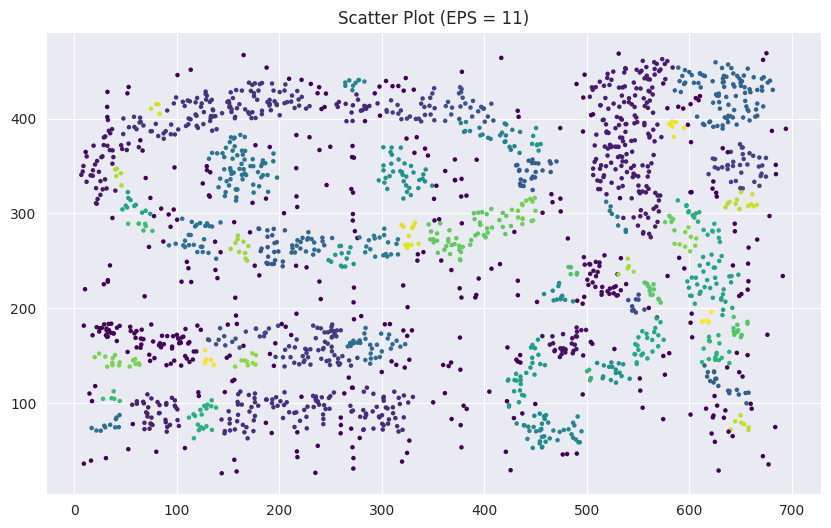

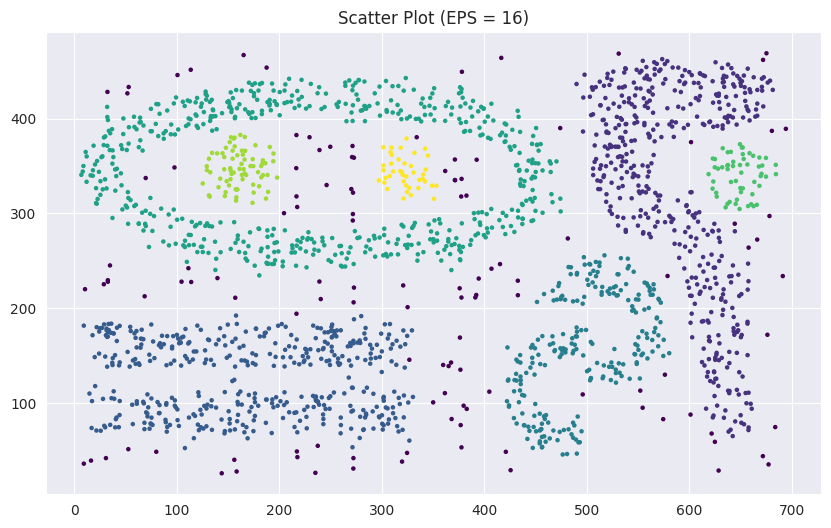

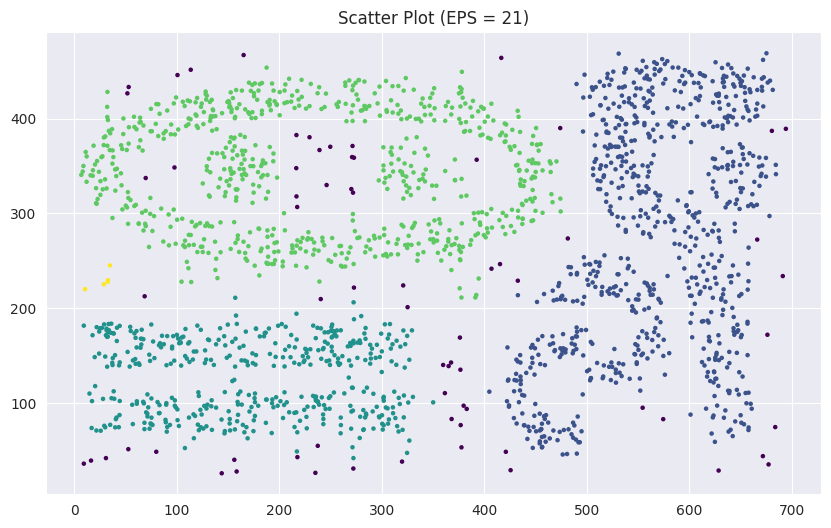

In [134]:
for i in [1, 6, 11, 16, 21]:
    exec_DBSCAN(i)